<h1 align="center">Zewail University of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2018)</h2>
<h2 align="center">Lab 8: K-means and GMM</h3>
<h3 align="center">08/11/2018</h3>

## <font color = "#af00af"> What is the difference between supervised and unsupervised learning? <font/>

## <font color="#00cccc">K-means<font/>

## Demo
Demo sources: 

https://github.com/UBC-CS/cpsc340/blob/master/lectures/L8demo.ipynb 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

#### make up some fake data

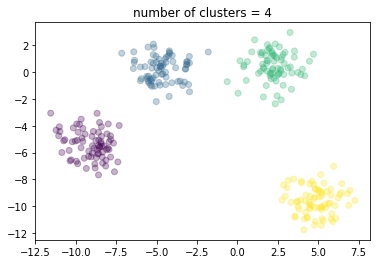

In [28]:
import numpy as np
import numpy.random as npr
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
%matplotlib inline

from lab8_functions import generate_data
from lab8_functions import plot_clust
from lab8_functions import plot_gmm


X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 4)
n = len(X)
plot_clust(X,z=z_true)

#### randomly initialize means

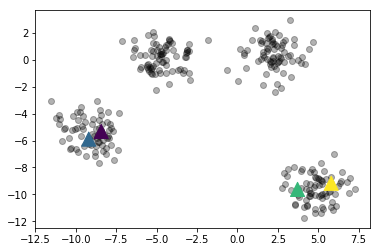

In [2]:
k = 4
npr.seed(2)

W = X[npr.choice(n, k, replace=False)]

plot_clust(X,W)

#### assign each object to closest mean

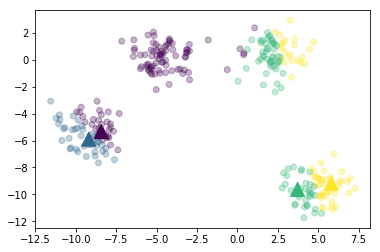

In [3]:
def update_z(X,W):
    dist2 = euclidean_distances(X, W)
    return np.argmin(dist2, axis=1)

z = update_z(X,W)
plot_clust(X,W,z)

#### recompute cluster centres

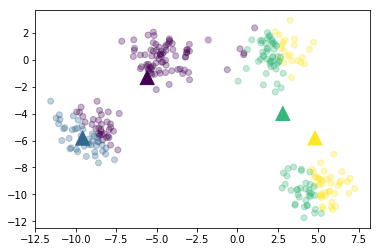

In [4]:
def update_W(X,z,W_old):
    # just being a bit careful about the case of a cluster with no points in it
    W = W_old.copy()
    for kk in range(k):
        W[kk] = np.mean(X[z==kk],axis=0)
    return W

W = update_W(X,z,W)
plot_clust(X,W,z)

#### run the whole thing for 100 iterations

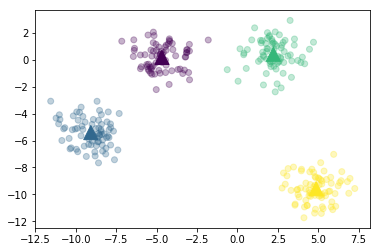

In [5]:
# better: loop until np.all(z_new == z)
for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
plot_clust(X,W,z)

## <font color = "#af00af"> Can we use accuracy to measure performance? <font/>

## <font color = "#af00af"> What is the Kmeans convergence criteria? <font/>

## <font color = "#af00af"> Can we guarantee convergence in Kmeans? <font/>

## <font color = "#af00af"> What are the problems of kmeans? <font/>

### 1) Initialization

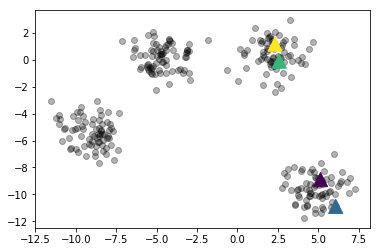

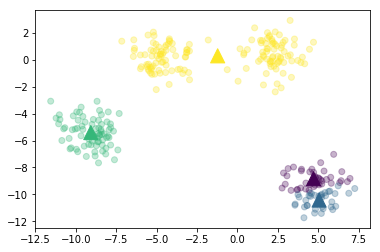

In [6]:
npr.seed(3)

X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 4)
n = len(X)
k = 4
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

### 2) Knowing k beforehand

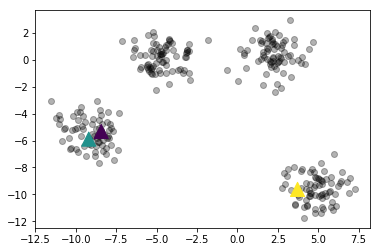

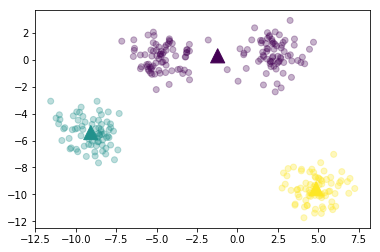

In [27]:
npr.seed(2)

X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 4)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

### 3) Assuming Isotropic Clusters

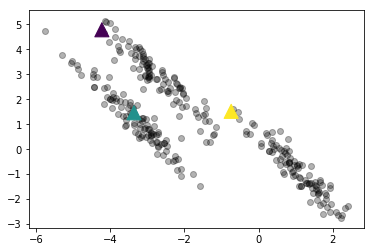

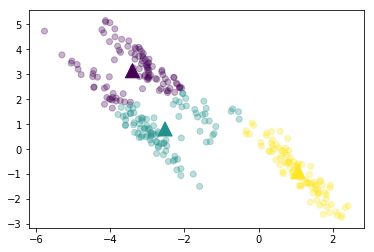

In [8]:
npr.seed(1)

X, z_true = generate_data(data_type = 2, random_state = 170, n_samples = 300, k = 3)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

### 4) Assuming Equal Variances

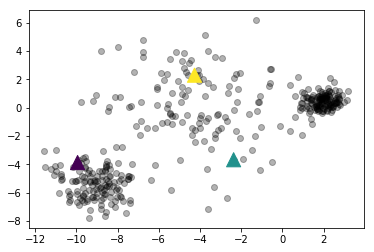

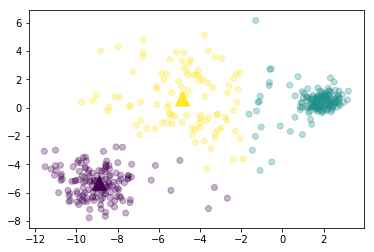

In [9]:
npr.seed(1)

X, z_true = generate_data(data_type = 3, random_state = 170, n_samples = 400, k = 3)
n = len(X)
k = 3
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

### 5) Assuming Convex Clusters

<img src="lab8_plot_kmeans_digits_001.png">
source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

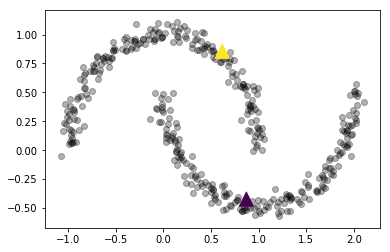

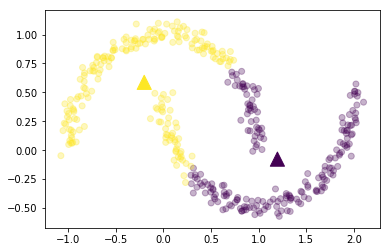

In [24]:
npr.seed(1)

X, z_true = generate_data(data_type = 4, random_state = 170, n_samples = 400, k = 2)
n = len(X)
k = 2
W = X[npr.choice(n, k, replace=False)]
plot_clust(X,W)

for itr in range(100):
    z = update_z(X,W)
    W = update_W(X,z,W)
    
plot_clust(X,W,z)

## <font color="#cc0000"> Gaussian Mixture Models (GMM)<font/>

#### Nice video with easy explanation: https://www.youtube.com/watch?v=JNlEIEwe-Cg
<img src="lab8_GMM_1_2d.PNG">
source: https://github.com/llSourcell/Gaussian_Mixture_Models/blob/master/intro_to_gmm_%26_em.ipynb
<img src="lab8_GMM.png">
source: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

## Expectation Maximization Algorithm
### Expectation (E) step: Given the current parameters of the model, estimate a probability distribution.
<img src="lab8_expectation.png" height="600" width="600">

### Maximization (M) step: Given the current data, estimate the parameters to update the model.
<img src="lab8_maximization.png" height="600" width="600">
source: https://www.youtube.com/watch?v=qMTuMa86NzU

## <font color = "#af00af"> What is the relation between GMM and Kmeans? <font/>

## <font color = "#af00af"> Can we solve the shortcomings of kmeans with GMM? <font/>

### 1) Initialization?

### 2) Knowing k beforehand?

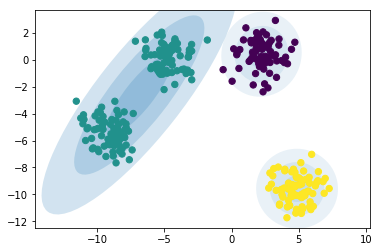

In [17]:
from sklearn.mixture import GaussianMixture 

X, z_true = generate_data(data_type = 1, random_state = 170, n_samples = 300, k = 4)
gmm = GaussianMixture(n_components=3)
plot_gmm(gmm, X)

### 3) Assuming Isotropic Clusters?

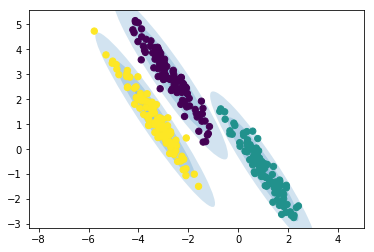

In [21]:
from sklearn.mixture import GaussianMixture 

X, z_true = generate_data(data_type = 2, random_state = 170, n_samples = 300, k = 3)
gmm = GaussianMixture(n_components=3)
plot_gmm(gmm, X)

### 4) Assuming Equal Variances?

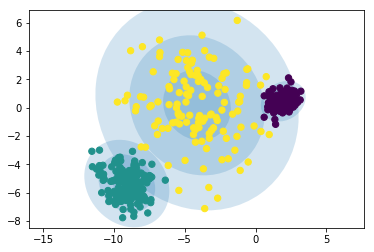

In [23]:
from sklearn.mixture import GaussianMixture 

X, z_true = generate_data(data_type = 3, random_state = 170, n_samples = 400, k = 3)
gmm = GaussianMixture(n_components=3)
plot_gmm(gmm, X)

### 5) Assuming Convex Clusters?

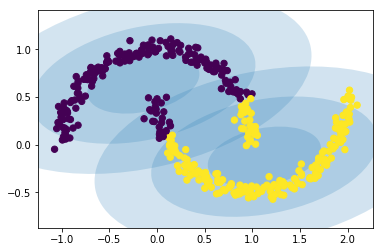

In [26]:
from sklearn.mixture import GaussianMixture 

X, z_true = generate_data(data_type = 4, random_state = 170, n_samples = 400, k = 2)
gmm = GaussianMixture(n_components=2)
plot_gmm(gmm, X)

## <font color = "#ff0000"> Exercise <font/>

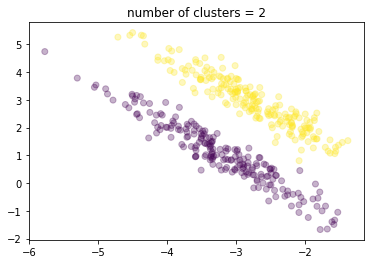

In [70]:
X, z_true = generate_data(data_type = 2, random_state = 170, n_samples = 400, k = 2)
plot_clust(X, z=z_true)

#### <font color = "#ff0000"> Using Sklearn, get the Kmeans clusters of X (and put them in z) <font/>

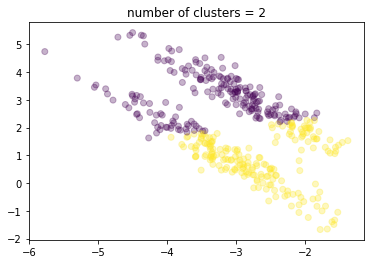

In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
z = kmeans.predict(X)
plot_clust(X=X,z=z)

#### <font color = "#ff0000"> Using Sklearn, get the GMM clusters of X (and put them in z) <font/>

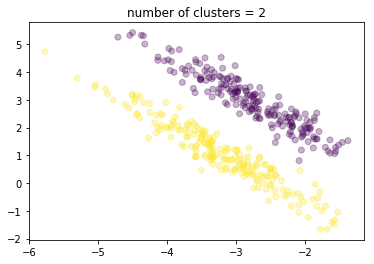

In [74]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components=2,covariance_type="full")
gmm.fit(X)
z = gmm.predict(X)
plot_clust(X=X,z=z)

#### <font color = "#ff0000"> By changing the parameters of the GMM, make it reproduce the same results as the kmeans (and why does that happen?) <font/>

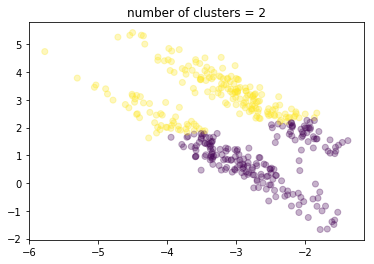

In [76]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components=2,covariance_type="spherical")
gmm.fit(X)
z = gmm.predict(X)
plot_clust(X=X,z=z)